In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as acs
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV
from random import randint

np.set_printoptions(suppress=True)

In [4]:
data = pd.read_csv('Proj1ReorderedRound.csv')
X = data.drop(['Condition'], axis = 1)
Y = data['Condition']

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

Xs = pd.DataFrame(scale(X))   #pre-standardizing X for use in SVM. Removes the need to scale within the loops

YClass = ['Condition3','Condtion4','Normal1']    #default target names. only useful in visualisation

In [5]:
k = 4

cv = sk(n_splits=k, shuffle=True, random_state=0)



Fold Group  1


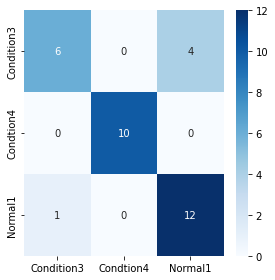

              precision    recall  f1-score   support

  Condition3       0.86      0.60      0.71        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.75      0.92      0.83        13

    accuracy                           0.85        33
   macro avg       0.87      0.84      0.84        33
weighted avg       0.86      0.85      0.84        33



Fold Group  2


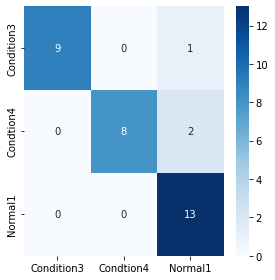

              precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       1.00      0.80      0.89        10
     Normal1       0.81      1.00      0.90        13

    accuracy                           0.91        33
   macro avg       0.94      0.90      0.91        33
weighted avg       0.93      0.91      0.91        33



Fold Group  3


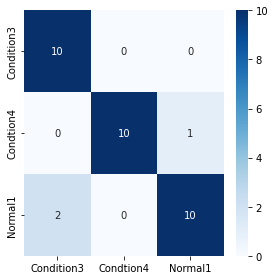

              precision    recall  f1-score   support

  Condition3       0.83      1.00      0.91        10
  Condition4       1.00      0.91      0.95        11
     Normal1       0.91      0.83      0.87        12

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.92      0.91      0.91        33



Fold Group  4


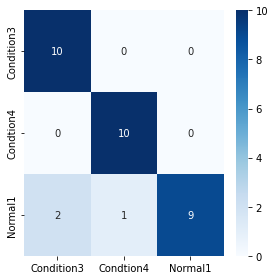

              precision    recall  f1-score   support

  Condition3       0.83      1.00      0.91        10
  Condition4       0.91      1.00      0.95        10
     Normal1       1.00      0.75      0.86        12

    accuracy                           0.91        32
   macro avg       0.91      0.92      0.91        32
weighted avg       0.92      0.91      0.90        32



average C3 Accuracy =  0.881
average C4 Accuracy =  0.9773
average N1 Accuracy =  0.8679
average Net Accuracy =  0.8932


In [6]:
#Default Linear SVM

model = SVC(kernel='linear', random_state=0, C=1.0)
n = 1

#creating lists to store the calculated accuracies for each fold group, allowing the average to be calculated later

C3AL = []    # Condition3 Accuracy List
C4AL = []    # Condition4 Accuracy List
N1AL = []    # Normal1 Accuracy List

NAL = []    # Net Accuracy List

for trainIndex, testIndex in cv.split(Xs, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = Xs.iloc[trainIndex]                 #train/test data allocation
    test_X = Xs.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)        #confusion matrix
    
    fig, ax = plt.subplots(figsize=(4,4))        #CM visualisation
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3AL.append(C3Acc)
    C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4AL.append(C4Acc)
    N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1AL.append(N1Acc)
    
    NetAcc = acs(test_Y,pred_Y)
    NAL.append(NetAcc)
    
print('\n')

print('average C3 Accuracy = ', np.mean(C3AL).round(4))
print('average C4 Accuracy = ' , np.mean(C4AL).round(4))
print('average N1 Accuracy = ', np.mean(N1AL).round(4))
print('average Net Accuracy = ', np.mean(NAL).round(4))

In [4]:
#this cell is for you to play around with, to see how the range is created dynamically
cbase = 0.55       #starting value = 1

Range = []
stage =  3       #starting value = 1

for i in range(-10,11):
    x = np.round(cbase + i*(10**(-stage)),stage)
    Range.append(x)

Range[0] = Range[0] + 10**(-stage-1)
Range

#pick one number from the cbase

[0.5401,
 0.541,
 0.542,
 0.543,
 0.544,
 0.545,
 0.546,
 0.547,
 0.548,
 0.549,
 0.55,
 0.551,
 0.552,
 0.553,
 0.554,
 0.555,
 0.556,
 0.557,
 0.558,
 0.559,
 0.56]

In [5]:
#linear SVM optimisation

In [6]:
cbase = 1
cbaseDF = pd.DataFrame(columns = ['C'])
index = 0

for stage in range(1,6):
    
    Range = []
    for i in range(-10,11):
        x = np.round(cbase + i*(10**(-stage)),stage)
        Range.append(x)
    Range[0] = Range[0] + 10**(-stage-1)
    
    param_grid = {'C': Range}
    grid = GridSearchCV(SVC(random_state = 0, kernel = 'linear'), param_grid, cv = cv, verbose = 1)
    grid.fit(Xs,Y.values.ravel())
    
    cbase = grid.best_params_['C']
    
    cbaseDF.loc[index] = cbase
    index += 1
    
cbest = cbaseDF.iloc[-1].values[0]
cbaseDF

Fitting 4 folds for each of 21 candidates, totalling 84 fits
Fitting 4 folds for each of 21 candidates, totalling 84 fits
Fitting 4 folds for each of 21 candidates, totalling 84 fits
Fitting 4 folds for each of 21 candidates, totalling 84 fits
Fitting 4 folds for each of 21 candidates, totalling 84 fits


,C
0,0.10000
1,0.13000
2,0.12600
3,0.12580
4,0.12573


In [7]:
cbest

0.12573



Fold Group  1


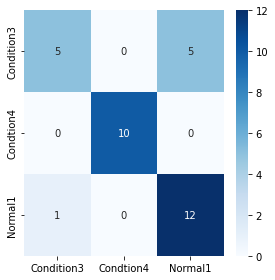

              precision    recall  f1-score   support

  Condition3       0.83      0.50      0.62        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.71      0.92      0.80        13

    accuracy                           0.82        33
   macro avg       0.85      0.81      0.81        33
weighted avg       0.83      0.82      0.81        33



Fold Group  2


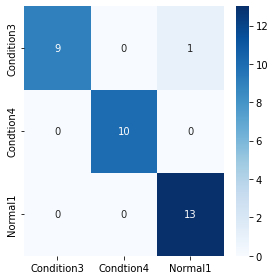

              precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.93      1.00      0.96        13

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  3


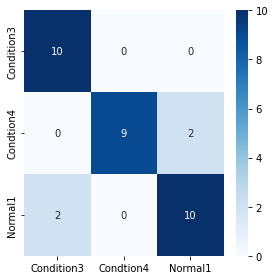

              precision    recall  f1-score   support

  Condition3       0.83      1.00      0.91        10
  Condition4       1.00      0.82      0.90        11
     Normal1       0.83      0.83      0.83        12

    accuracy                           0.88        33
   macro avg       0.89      0.88      0.88        33
weighted avg       0.89      0.88      0.88        33



Fold Group  4


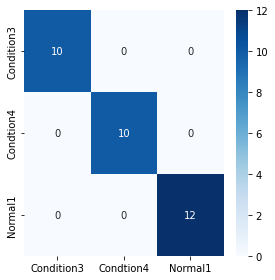

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


Tuned Linear SVM

C =  0.12573
average C3 Precision =  0.9167
average C4 Precision =  1.0
average N1 Precision =  0.8669
average Accuracy =  0.9167


In [8]:
#Optimised linear svm
model = SVC(kernel='linear', random_state=0, C = cbest)
n = 1

C3PL = []
C4PL = []
N1PL = []

AL = []

for trainIndex, testIndex in cv.split(Xs, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = Xs.iloc[trainIndex]
    test_X = Xs.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3PL.append(C3Pre)
    C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4PL.append(C4Pre)
    N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1PL.append(N1Pre)
    
    Acc = acs(test_Y,pred_Y)
    AL.append(Acc)
    
print('\nTuned Linear SVM\n')

print('C = ', cbest)
print('average C3 Precision = ', np.mean(C3PL).round(4))
print('average C4 Precision = ' , np.mean(C4PL).round(4))
print('average N1 Precision = ', np.mean(N1PL).round(4))
print('average Accuracy = ', np.mean(AL).round(4))

In [ ]:
#polynomial kernel - firstly we looked at the best degree

In [7]:
colNames = ['degree','C3A','C4A','N1A','NetA']
AccDF = pd.DataFrame(columns = colNames)
AccIndex = 0

for d in range(4):
    deg = d + 2
    
    N1AL = []    # Normal1 Accuracy List
    C3AL = []    # Condition3 Accuracy List
    C4AL = []    # Condition4 Accuracy List
    NAL = []
        
    print('degree = ', deg)
    
    model = SVC(kernel='poly', random_state = 0, degree = deg)

    for trainIndex, testIndex in cv.split(Xs,Y):
    
        train_X = Xs.iloc[trainIndex]                 #train/test data allocation
        test_X = Xs.iloc[testIndex]
        train_Y = Y.iloc[trainIndex]
        test_Y = Y.iloc[testIndex]
    
        model.fit(train_X,train_Y.values.ravel())                   #model building and prediction
        pred_Y = model.predict(test_X)
    
        CM = confusion_matrix(test_Y, pred_Y)        #confusion matrix
    
        C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
        C3AL.append(C3Acc)
        C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
        C4AL.append(C4Acc)
        N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
        N1AL.append(N1Acc)
    
        NetAcc = acs(test_Y,pred_Y)
        NAL.append(NetAcc)
        
    # at the end of cross validation, calculate accuracy averages
    
    C3Amean = np.mean(C3AL).round(4)
    C4Amean = np.mean(C4AL).round(4)
    N1Amean = np.mean(N1AL).round(4)
    NetAmean = np.mean(NAL).round(4)
    
    print('C3Acc =', C3Amean)
    print('C4Acc =', C4Amean)
    print('N1Acc =', N1Amean)
    print('NetAcc =', NetAmean,'\n')
        
    AccDF.loc[AccIndex] = [deg,C3Amean,C4Amean,N1Amean,NetAmean]#stores result in AccDF
    AccIndex = AccIndex + 1

degree =  2
C3Acc = 0.275
C4Acc = 0.3511
N1Acc = 0.6687
NetAcc = 0.5114 

degree =  3
C3Acc = 1.0
C4Acc = 1.0
N1Acc = 0.6481
NetAcc = 0.7784 

degree =  4
C3Acc = 0.4
C4Acc = 0.4155
N1Acc = 0.5164
NetAcc = 0.4886 

degree =  5
C3Acc = 1.0
C4Acc = 1.0
N1Acc = 0.4606
NetAcc = 0.5497 



In [8]:
AccDF

,degree,C3A,C4A,N1A,NetA
0,2.0,0.275,0.3511,0.6687,0.5114
1,3.0,1.000,1.0000,0.6481,0.7784
2,4.0,0.400,0.4155,0.5164,0.4886
3,5.0,1.000,1.0000,0.4606,0.5497




Fold Group  1


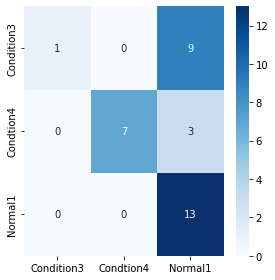

              precision    recall  f1-score   support

  Condition3       1.00      0.10      0.18        10
  Condition4       1.00      0.70      0.82        10
     Normal1       0.52      1.00      0.68        13

    accuracy                           0.64        33
   macro avg       0.84      0.60      0.56        33
weighted avg       0.81      0.64      0.57        33



Fold Group  2


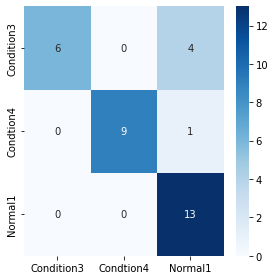

              precision    recall  f1-score   support

  Condition3       1.00      0.60      0.75        10
  Condition4       1.00      0.90      0.95        10
     Normal1       0.72      1.00      0.84        13

    accuracy                           0.85        33
   macro avg       0.91      0.83      0.85        33
weighted avg       0.89      0.85      0.84        33



Fold Group  3


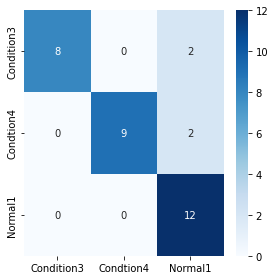

              precision    recall  f1-score   support

  Condition3       1.00      0.80      0.89        10
  Condition4       1.00      0.82      0.90        11
     Normal1       0.75      1.00      0.86        12

    accuracy                           0.88        33
   macro avg       0.92      0.87      0.88        33
weighted avg       0.91      0.88      0.88        33



Fold Group  4


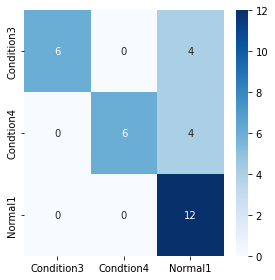

              precision    recall  f1-score   support

  Condition3       1.00      0.60      0.75        10
  Condition4       1.00      0.60      0.75        10
     Normal1       0.60      1.00      0.75        12

    accuracy                           0.75        32
   macro avg       0.87      0.73      0.75        32
weighted avg       0.85      0.75      0.75        32



average C3 Accuracy =  1.0
average C4 Accuracy =  1.0
average N1 Accuracy =  0.6481
average Net Accuracy =  0.7784


In [9]:
#plotting the default 3rd degree poly SVM

model = SVC(kernel='poly', random_state=0, degree = 3)  #which so happens that degree = 3 is the default setting for poly
n = 1

C3AL = []
C4AL = []
N1AL = []

NAL = []

for trainIndex, testIndex in cv.split(Xs, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = Xs.iloc[trainIndex]
    test_X = Xs.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3AL.append(C3Acc)
    C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4AL.append(C4Acc)
    N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1AL.append(N1Acc)
    
    NetAcc = acs(test_Y,pred_Y)
    NAL.append(NetAcc)
    
print('\n')

print('average C3 Accuracy = ', np.mean(C3AL).round(4))
print('average C4 Accuracy = ' , np.mean(C4AL).round(4))
print('average N1 Accuracy = ', np.mean(N1AL).round(4))
print('average Net Accuracy = ', np.mean(NAL).round(4))

In [9]:
#poly SVM optimisation

In [10]:
cbase = 1
gbase = 1

baseDF = pd.DataFrame(columns = ['C','gamma'])

index = 0

for stage in range(1,6):
    
    cRange = []
    gRange = []
    for i in range(-10,11):
        x = np.round(cbase + i*(10**(-stage)),stage)
        cRange.append(x)
        y = np.round(gbase + i*(10**(-stage)),stage)
        gRange.append(y)
    cRange[0] = cRange[0] + 10**(-stage-1)
    gRange[0] = gRange[0] + 10**(-stage-1)
    
    param_grid = {'C': cRange, 'gamma': gRange}
    grid = GridSearchCV(SVC(random_state = 0, kernel = 'poly', degree = 3), param_grid, cv = cv, verbose = 1)
    grid.fit(Xs,Y.values.ravel())
    
    cbase = grid.best_params_['C']
    gbase = grid.best_params_['gamma']
    
    baseDF.loc[index] = [cbase,gbase]
    
    index += 1


baseDF

Fitting 4 folds for each of 441 candidates, totalling 1764 fits
Fitting 4 folds for each of 441 candidates, totalling 1764 fits
Fitting 4 folds for each of 441 candidates, totalling 1764 fits
Fitting 4 folds for each of 441 candidates, totalling 1764 fits
Fitting 4 folds for each of 441 candidates, totalling 1764 fits


,C,gamma
0,1.700000,0.10000
1,1.660000,0.10000
2,1.650100,0.10100
3,1.649110,0.10010
4,1.649011,0.10006


In [11]:
cbest,gbest = baseDF.iloc[-1]



Fold Group  1


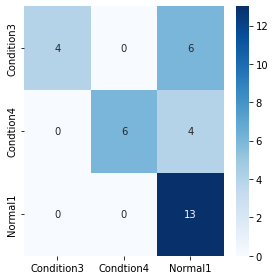

              precision    recall  f1-score   support

  Condition3       1.00      0.40      0.57        10
  Condition4       1.00      0.60      0.75        10
     Normal1       0.57      1.00      0.72        13

    accuracy                           0.70        33
   macro avg       0.86      0.67      0.68        33
weighted avg       0.83      0.70      0.68        33



Fold Group  2


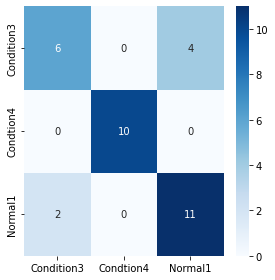

              precision    recall  f1-score   support

  Condition3       0.75      0.60      0.67        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.73      0.85      0.79        13

    accuracy                           0.82        33
   macro avg       0.83      0.82      0.82        33
weighted avg       0.82      0.82      0.81        33



Fold Group  3


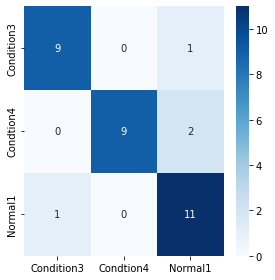

              precision    recall  f1-score   support

  Condition3       0.90      0.90      0.90        10
  Condition4       1.00      0.82      0.90        11
     Normal1       0.79      0.92      0.85        12

    accuracy                           0.88        33
   macro avg       0.90      0.88      0.88        33
weighted avg       0.89      0.88      0.88        33



Fold Group  4


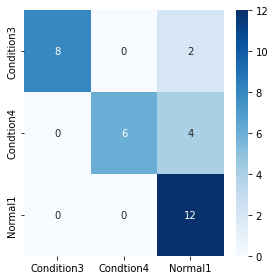

              precision    recall  f1-score   support

  Condition3       1.00      0.80      0.89        10
  Condition4       1.00      0.60      0.75        10
     Normal1       0.67      1.00      0.80        12

    accuracy                           0.81        32
   macro avg       0.89      0.80      0.81        32
weighted avg       0.88      0.81      0.81        32


Tuned Polynomial (3rd degree) SVM

C =  1.649011
gamma =  0.10006
average C3 Precision =  0.9125
average C4 Precision =  1.0
average N1 Precision =  0.6877
average Accuracy =  0.8016


In [12]:
model = SVC(kernel='poly', degree = 3, random_state=0,C = cbest,gamma = gbest)
n = 1

C3PL = []
C4PL = []
N1PL = []

AL = []

for trainIndex, testIndex in cv.split(Xs, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = Xs.iloc[trainIndex]
    test_X = Xs.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3PL.append(C3Pre)
    C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4PL.append(C4Pre)
    N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1PL.append(N1Pre)
    
    Acc = acs(test_Y,pred_Y)
    AL.append(Acc)
    
print('\nTuned Polynomial (3rd degree) SVM\n')

print('C = ', cbest)
print('gamma = ', gbest)
print('average C3 Precision = ', np.mean(C3PL).round(4))
print('average C4 Precision = ' , np.mean(C4PL).round(4))
print('average N1 Precision = ', np.mean(N1PL).round(4))
print('average Accuracy = ', np.mean(AL).round(4))



Fold Group  1


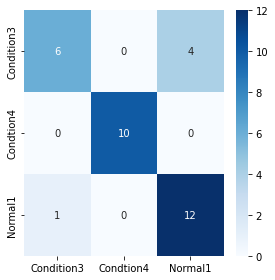

              precision    recall  f1-score   support

  Condition3       0.86      0.60      0.71        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.75      0.92      0.83        13

    accuracy                           0.85        33
   macro avg       0.87      0.84      0.84        33
weighted avg       0.86      0.85      0.84        33



Fold Group  2


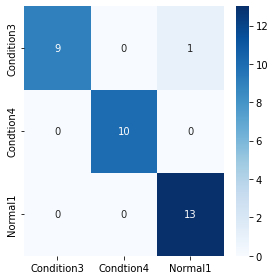

              precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.93      1.00      0.96        13

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  3


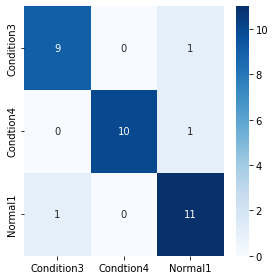

              precision    recall  f1-score   support

  Condition3       0.90      0.90      0.90        10
  Condition4       1.00      0.91      0.95        11
     Normal1       0.85      0.92      0.88        12

    accuracy                           0.91        33
   macro avg       0.92      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



Fold Group  4


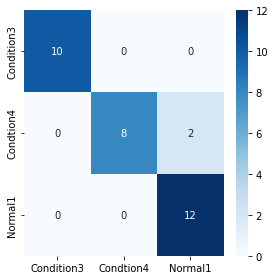

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       1.00      0.80      0.89        10
     Normal1       0.86      1.00      0.92        12

    accuracy                           0.94        32
   macro avg       0.95      0.93      0.94        32
weighted avg       0.95      0.94      0.94        32



average C3 Accuracy =  0.9393
average C4 Accuracy =  1.0
average N1 Accuracy =  0.8455
average Net Accuracy =  0.9162


In [14]:
#default RBF

model = SVC(kernel='rbf', random_state=0)
n = 1

C3AL = []
C4AL = []
N1AL = []

NAL = []

for trainIndex, testIndex in cv.split(Xs, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = Xs.iloc[trainIndex]
    test_X = Xs.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Acc = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3AL.append(C3Acc)
    C4Acc = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4AL.append(C4Acc)
    N1Acc = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1AL.append(N1Acc)
    
    NetAcc = acs(test_Y,pred_Y)
    NAL.append(NetAcc)
    
print('\n')

print('average C3 Accuracy = ', np.mean(C3AL).round(4))
print('average C4 Accuracy = ' , np.mean(C4AL).round(4))
print('average N1 Accuracy = ', np.mean(N1AL).round(4))
print('average Net Accuracy = ', np.mean(NAL).round(4))


In [13]:
#RBF SVM optimisation

In [15]:
cbase = 1
gbase = 1

baseDF = pd.DataFrame(columns = ['C','gamma'])

index = 0

for stage in range(1,6):
    
    cRange = []
    gRange = []
    for i in range(-10,11):
        x = np.round(cbase + i*(10**(-stage)),stage)
        cRange.append(x)
        y = np.round(gbase + i*(10**(-stage)),stage)
        gRange.append(y)
    cRange[0] = cRange[0] + 10**(-stage-1)
    gRange[0] = gRange[0] + 10**(-stage-1)
    
    param_grid = {'C': cRange, 'gamma': gRange}
    grid = GridSearchCV(SVC(random_state = 0, kernel = 'rbf'), param_grid, cv = cv, verbose = 1)
    grid.fit(Xs,Y.values.ravel())
    
    cbase = grid.best_params_['C']
    gbase = grid.best_params_['gamma']
    
    baseDF.loc[index] = [cbase,gbase]
    
    index += 1


baseDF

Fitting 4 folds for each of 441 candidates, totalling 1764 fits
Fitting 4 folds for each of 441 candidates, totalling 1764 fits
Fitting 4 folds for each of 441 candidates, totalling 1764 fits
Fitting 4 folds for each of 441 candidates, totalling 1764 fits
Fitting 4 folds for each of 441 candidates, totalling 1764 fits


,C,gamma
0,1.70000,0.1000
1,1.74000,0.0900
2,1.73800,0.0900
3,1.73720,0.0901
4,1.73711,0.0901


In [15]:
cbest,gbest = baseDF.iloc[-1]



Fold Group  1


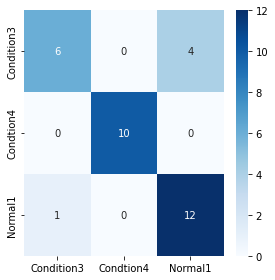

              precision    recall  f1-score   support

  Condition3       0.86      0.60      0.71        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.75      0.92      0.83        13

    accuracy                           0.85        33
   macro avg       0.87      0.84      0.84        33
weighted avg       0.86      0.85      0.84        33



Fold Group  2


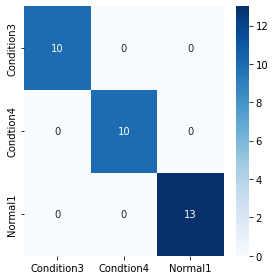

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        13

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Fold Group  3


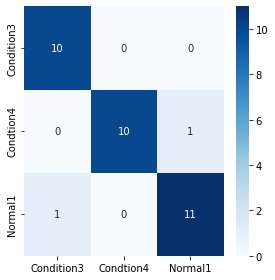

              precision    recall  f1-score   support

  Condition3       0.91      1.00      0.95        10
  Condition4       1.00      0.91      0.95        11
     Normal1       0.92      0.92      0.92        12

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



Fold Group  4


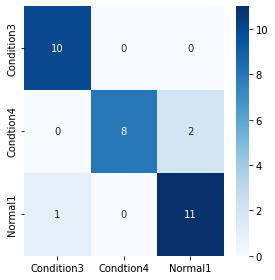

              precision    recall  f1-score   support

  Condition3       0.91      1.00      0.95        10
  Condition4       1.00      0.80      0.89        10
     Normal1       0.85      0.92      0.88        12

    accuracy                           0.91        32
   macro avg       0.92      0.91      0.91        32
weighted avg       0.91      0.91      0.91        32


Tuned RBF SVM

C =  1.73711
gamma =  0.0901
average C3 Precision =  0.9188
average C4 Precision =  1.0
average N1 Precision =  0.8782
average Accuracy =  0.9235


In [16]:
model = SVC(kernel='rbf', random_state=0,C = cbest,gamma = gbest)
n = 1

C3PL = []
C4PL = []
N1PL = []

AL = []

for trainIndex, testIndex in cv.split(Xs, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = Xs.iloc[trainIndex]
    test_X = Xs.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3PL.append(C3Pre)
    C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4PL.append(C4Pre)
    N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1PL.append(N1Pre)
    
    Acc = acs(test_Y,pred_Y)
    AL.append(Acc)
    
print('\nTuned RBF SVM\n')

print('C = ', cbest)
print('gamma = ', gbest)
print('average C3 Precision = ', np.mean(C3PL).round(4))
print('average C4 Precision = ' , np.mean(C4PL).round(4))
print('average N1 Precision = ', np.mean(N1PL).round(4))
print('average Accuracy = ', np.mean(AL).round(4))

In [17]:
test = np.array([1,2,3])   #np
test2 = []   #default

for num in test:
    test2.append(num)

test2

[1, 2, 3]

In [18]:
test = [1,2,3]
test

[1, 2, 3]

In [19]:
#default gamma values
model = SVC(kernel='rbf', random_state=0) 
model.fit(train_X, train_Y.values.ravel())
model._gamma

0.0839457315414482

In [20]:
pd.DataFrame(train_X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.083950,0.043271,-0.047309,-0.043249,-0.036610,-0.010814,0.007551,0.066083,0.062111,0.012143,-0.011114,-0.019490
std,1.013101,1.006350,1.034323,0.991044,0.948263,0.967955,1.035803,1.026996,1.014438,0.982489,0.991464,0.989487
min,-1.729050,-1.965854,-1.721321,-1.666716,-1.899896,-1.668533,-2.179749,-1.756399,-1.523006,-2.094089,-2.267432,-1.721025
25%,-0.645741,-0.784950,-0.998388,-0.945946,-0.645449,-0.795333,-0.699782,-0.899902,-0.513832,-0.763199,-0.679528,-0.760261
50%,0.079706,0.235997,-0.037920,-0.073020,-0.088706,-0.119424,0.006958,0.168339,0.091673,0.048319,-0.129868,0.060216
75%,0.908233,0.837659,0.787141,0.742989,0.648681,0.843289,0.614862,1.048032,1.100847,0.805737,0.652297,0.626940
max,1.786031,1.613820,1.771706,1.702138,1.723668,1.546599,2.226641,1.614866,1.706352,2.169088,2.457805,2.298974


In [21]:
1/(pd.DataFrame(train_X).describe().iloc[2]**2).sum()

0.08325485468680456